In [50]:
# Libraries being used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [51]:
# Loading NBA dataset and viewing the first 20 lines
# Created a Pandas DataFrame called nba_df

nba_df = pd.read_csv('NBA_data.csv')
nba_df.head(10)

,RK,Team,Year,G,W,L,Conference,MP,FG,FGA,...,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,1,Golden State Warriors,1990,82,37,45,West,240.3,42.5,87.9,...,34.9,0.809,11.2,29.1,24.1,9.2,6.0,17.3,24.5,116.3
1,2,Phoenix Suns*,1990,82,54,28,West,242.1,43.2,87.1,...,33.1,0.795,12.8,32.3,25.7,8.1,6.1,15.5,22.3,114.9
2,3,Denver Nuggets*,1990,82,43,39,West,241.5,45.3,97.7,...,26.8,0.789,14.3,30.9,27.7,9.9,4.0,13.9,25.0,114.6
3,4,Portland Trail Blazers*,1990,82,59,23,West,242.4,43.6,92.0,...,33.3,0.743,16.5,31.1,25.4,9.1,4.4,16.5,25.0,114.2
4,5,Orlando Magic,1990,82,18,64,East,241.5,42.2,91.8,...,33.2,0.756,15.9,30.1,24.3,7.5,3.6,17.2,24.1,110.9
5,6,Los Angeles Lakers*,1990,82,63,19,West,242.1,41.9,85.5,...,29.5,0.787,13.4,30.0,27.2,8.0,5.4,15.0,21.2,110.7
6,7,Philadelphia 76ers*,1990,82,53,29,East,241.5,41.9,85.7,...,30.6,0.788,13.5,29.3,23.6,8.4,4.5,14.7,20.7,110.2
7,8,Boston Celtics*,1990,82,52,30,East,240.3,43.5,87.2,...,26.3,0.832,13.0,33.0,29.5,6.6,5.5,15.3,20.9,110.0
8,9,Chicago Bulls*,1990,82,55,27,East,241.8,43.1,86.5,...,26.1,0.778,13.1,27.8,26.5,9.9,4.7,15.2,23.2,109.5
9,10,Indiana Pacers*,1990,82,42,40,East,242.4,41.2,83.0,...,28.5,0.816,11.5,29.1,24.7,6.7,4.3,16.4,24.0,109.3


In [52]:
nba_df.tail()

,RK,Team,Year,G,W,L,Conference,MP,FG,FGA,...,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
928,26,Oklahoma City Thunder,2021,37,16,21,West,242.0,39.0,87.5,...,20.4,0.739,7.9,36.7,23.1,6.9,4.3,14.4,18.4,106.2
929,27,Houston Rockets,2021,36,11,25,West,240.7,38.6,89.0,...,22.2,0.753,9.1,33.6,22.0,8.1,5.6,14.6,20.3,107.3
930,28,Cleveland Cavaliers,2021,37,14,23,East,243.4,39.4,87.2,...,21.9,0.726,11.2,32.3,23.3,8.4,5.3,15.9,19.3,104.0
931,29,Memphis Grizzlies,2021,34,17,17,West,240.7,42.7,91.8,...,19.7,0.790,11.1,34.4,27.1,9.8,4.4,13.9,19.0,111.8
932,30,San Antonio Spurs,2021,34,19,15,West,241.5,41.5,91.1,...,20.9,0.790,8.9,35.7,25.0,7.4,4.8,11.1,17.4,110.6


In [53]:
nba_df.shape

(933, 28)

### DATA CLEANING


In [54]:
# Creating a 'Playoffs' column for.  Did the team make the playoffs?
# * after teams name identifies whether team made the playoffs or not

nba_df["Playoffs"] = nba_df["Team"].map(lambda x: 1 if "*" in x else 0)

nba_df.head(10)

,RK,Team,Year,G,W,L,Conference,MP,FG,FGA,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
0,1,Golden State Warriors,1990,82,37,45,West,240.3,42.5,87.9,...,0.809,11.2,29.1,24.1,9.2,6.0,17.3,24.5,116.3,0
1,2,Phoenix Suns*,1990,82,54,28,West,242.1,43.2,87.1,...,0.795,12.8,32.3,25.7,8.1,6.1,15.5,22.3,114.9,1
2,3,Denver Nuggets*,1990,82,43,39,West,241.5,45.3,97.7,...,0.789,14.3,30.9,27.7,9.9,4.0,13.9,25.0,114.6,1
3,4,Portland Trail Blazers*,1990,82,59,23,West,242.4,43.6,92.0,...,0.743,16.5,31.1,25.4,9.1,4.4,16.5,25.0,114.2,1
4,5,Orlando Magic,1990,82,18,64,East,241.5,42.2,91.8,...,0.756,15.9,30.1,24.3,7.5,3.6,17.2,24.1,110.9,0
5,6,Los Angeles Lakers*,1990,82,63,19,West,242.1,41.9,85.5,...,0.787,13.4,30.0,27.2,8.0,5.4,15.0,21.2,110.7,1
6,7,Philadelphia 76ers*,1990,82,53,29,East,241.5,41.9,85.7,...,0.788,13.5,29.3,23.6,8.4,4.5,14.7,20.7,110.2,1
7,8,Boston Celtics*,1990,82,52,30,East,240.3,43.5,87.2,...,0.832,13.0,33.0,29.5,6.6,5.5,15.3,20.9,110.0,1
8,9,Chicago Bulls*,1990,82,55,27,East,241.8,43.1,86.5,...,0.778,13.1,27.8,26.5,9.9,4.7,15.2,23.2,109.5,1
9,10,Indiana Pacers*,1990,82,42,40,East,242.4,41.2,83.0,...,0.816,11.5,29.1,24.7,6.7,4.3,16.4,24.0,109.3,1


In [55]:
# Remove * after I identify 'Playoff' teams

nba_df["Team"] = nba_df["Team"].str.replace("*", "")

nba_df.head()

,RK,Team,Year,G,W,L,Conference,MP,FG,FGA,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
0,1,Golden State Warriors,1990,82,37,45,West,240.3,42.5,87.9,...,0.809,11.2,29.1,24.1,9.2,6.0,17.3,24.5,116.3,0
1,2,Phoenix Suns,1990,82,54,28,West,242.1,43.2,87.1,...,0.795,12.8,32.3,25.7,8.1,6.1,15.5,22.3,114.9,1
2,3,Denver Nuggets,1990,82,43,39,West,241.5,45.3,97.7,...,0.789,14.3,30.9,27.7,9.9,4.0,13.9,25.0,114.6,1
3,4,Portland Trail Blazers,1990,82,59,23,West,242.4,43.6,92.0,...,0.743,16.5,31.1,25.4,9.1,4.4,16.5,25.0,114.2,1
4,5,Orlando Magic,1990,82,18,64,East,241.5,42.2,91.8,...,0.756,15.9,30.1,24.3,7.5,3.6,17.2,24.1,110.9,0


In [56]:
nba_df.shape

(933, 29)

In [57]:
nba_df.columns

Index(['RK', 'Team', 'Year', 'G', 'W', 'L', 'Conference', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Playoffs'],
      dtype='object')

In [58]:
# Split 2021 data from 2020 data
# There is no Playoff data for 2021 and that is what we will be predicting
 
test_df = nba_df.query("Year == 2021")       # 2021 Data
model_df = nba_df.query("Year <= 2020")      # 1991 - 2020 Data

In [59]:
test_df.shape


(30, 29)

In [60]:
model_df.shape

(903, 29)

In [61]:
test_df.head()

,RK,Team,Year,G,W,L,Conference,MP,FG,FGA,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
903,1,Brooklyn Nets,2021,38,25,13,East,243.3,43.8,87.7,...,0.804,8.7,35.6,27.1,6.4,5.3,14.4,19.2,121.1,0
904,2,Los Angeles Clippers,2021,39,25,14,West,240.0,41.9,86.7,...,0.843,9.5,35.0,24.4,7.0,4.6,13.3,19.4,115.2,0
905,3,Milwaukee Bucks,2021,37,23,14,East,240.0,44.4,91.1,...,0.740,10.4,37.6,25.8,8.1,4.9,13.5,17.9,119.2,0
906,4,Philadelphia 76ers,2021,38,26,12,East,242.0,41.8,87.0,...,0.788,10.2,35.6,23.5,8.8,6.2,15.5,19.9,115.3,0
907,5,New Orleans Pelicans,2021,38,16,22,West,241.3,42.9,88.9,...,0.729,12.1,34.8,25.6,7.2,4.1,14.0,17.6,115.2,0


In [63]:
model_df.tail()

,RK,Team,Year,G,W,L,Conference,MP,FG,FGA,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
898,26,New York Knicks,2020,66,21,45,East,241.9,40.0,89.3,...,0.694,12.0,34.5,22.1,7.6,4.7,14.3,22.2,105.8,0
899,27,Cleveland Cavaliers,2020,65,19,46,East,241.9,40.3,87.9,...,0.758,10.8,33.4,23.1,6.9,3.2,16.5,18.3,106.9,0
900,28,Chicago Bulls,2020,65,22,43,East,241.2,39.6,88.6,...,0.755,10.5,31.4,23.2,10.0,4.1,15.5,21.8,106.8,0
901,29,Golden State Warriors,2020,65,15,50,West,241.9,38.6,88.2,...,0.803,10.0,32.9,25.6,8.2,4.6,14.9,20.1,106.3,0
902,30,Charlotte Hornets,2020,65,23,42,East,242.3,37.3,85.9,...,0.748,11.0,31.8,23.8,6.6,4.1,14.6,18.8,102.9,0


## Exploratory Data Analysis

In [64]:
# Looking up some general stats of the data

model_df.describe()

,RK,Year,G,W,L,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,...,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,15.086379,2005.299003,80.059801,40.029900,40.029900,241.747398,37.707752,82.676966,0.455983,6.188372,...,0.754054,11.829347,30.652049,22.411296,7.862348,4.985161,14.904983,21.601440,100.364452,0.549280
std,8.445289,8.882659,6.507609,12.996852,12.935975,0.867389,2.551680,4.074089,0.018039,2.764887,...,0.029961,1.762976,2.293448,2.271960,1.007125,0.883578,1.306553,1.899839,6.424198,0.497841
min,1.000000,1990.000000,50.000000,7.000000,9.000000,240.000000,30.800000,71.200000,0.401000,0.500000,...,0.660000,7.600000,24.900000,15.600000,5.500000,2.400000,11.200000,16.600000,81.900000,0.000000
25%,8.000000,1998.000000,82.000000,30.000000,30.000000,241.200000,36.000000,79.700000,0.444000,4.150000,...,0.736000,10.600000,29.100000,20.800000,7.200000,4.300000,14.000000,20.300000,95.800000,0.000000
50%,15.000000,2005.000000,82.000000,41.000000,39.000000,241.800000,37.400000,82.400000,0.455000,5.900000,...,0.755000,11.700000,30.400000,22.200000,7.800000,4.900000,14.800000,21.500000,99.700000,1.000000
75%,22.000000,2013.000000,82.000000,50.000000,49.000000,242.300000,39.300000,85.500000,0.467000,7.750000,...,0.774000,12.900000,32.000000,23.900000,8.500000,5.500000,15.800000,22.850000,104.300000,1.000000
max,30.000000,2020.000000,82.000000,73.000000,72.000000,244.900000,47.600000,108.100000,0.512000,16.100000,...,0.834000,18.500000,42.200000,30.400000,12.800000,8.400000,19.000000,28.100000,119.900000,1.000000


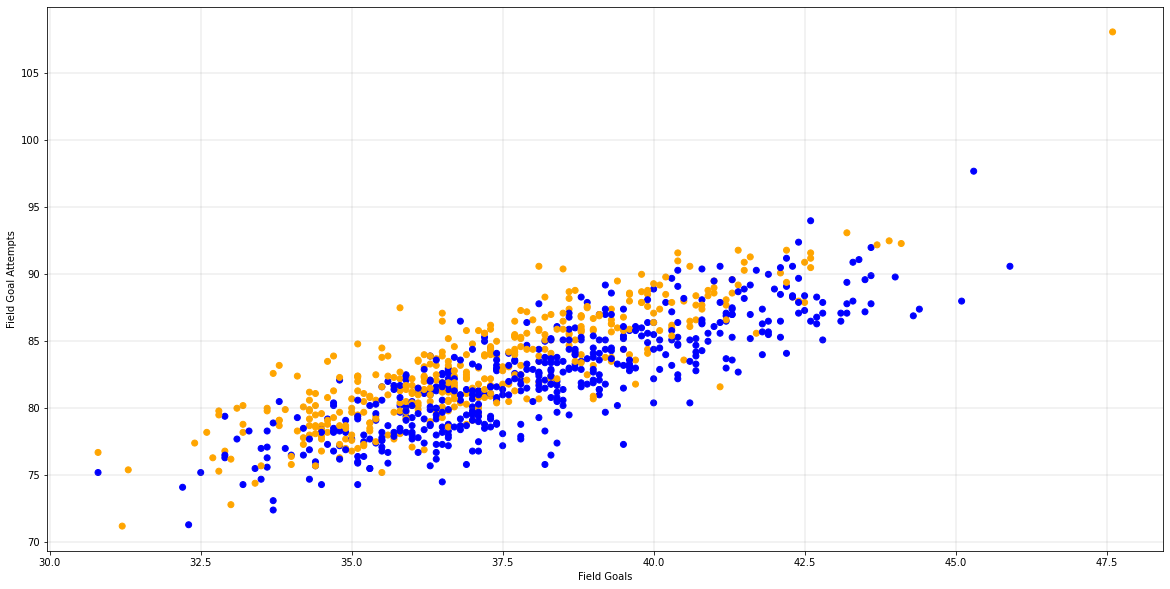

[[1.         0.81468721]
 [0.81468721 1.        ]]


In [65]:
# If team made the playoffs 'Blue', If they did not make the Playoffs 'Orange'

colors = {1:'blue', 0:'orange'}
plt.scatter(model_df['FG'], model_df['FGA'], c=model_df['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Field Goals')
plt.ylabel('Field Goal Attempts')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(model_df['FG'], model_df['FGA']))

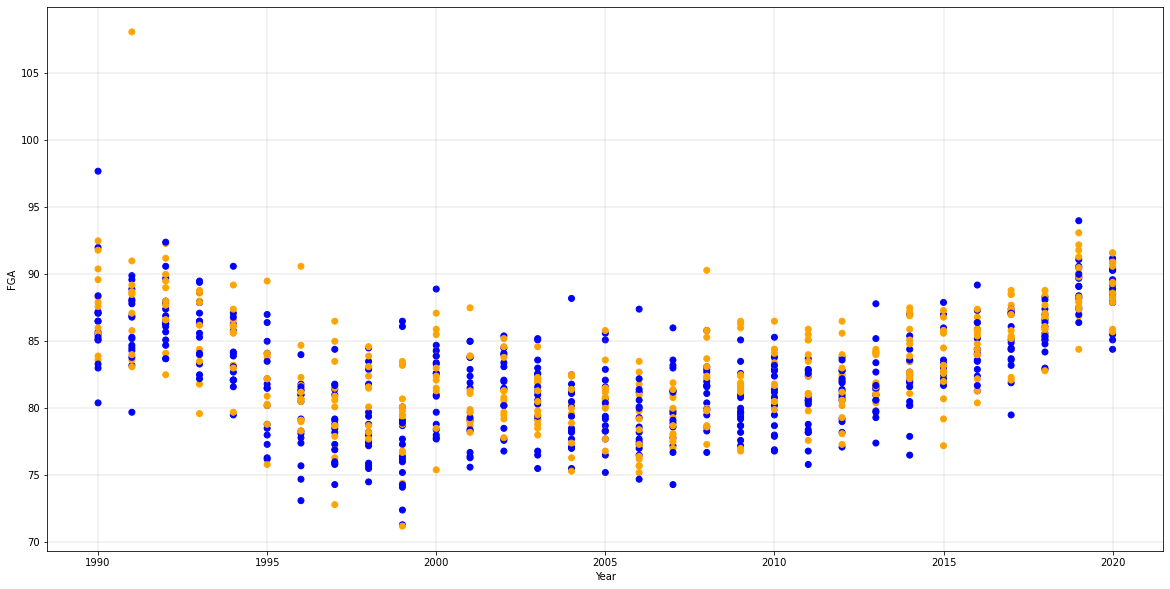

[[ 1.         -0.09629777]
 [-0.09629777  1.        ]]


In [66]:
plt.scatter(model_df['Year'], model_df['FGA'], c=model_df['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('FGA')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(model_df['FGA'], model_df['Playoffs']))

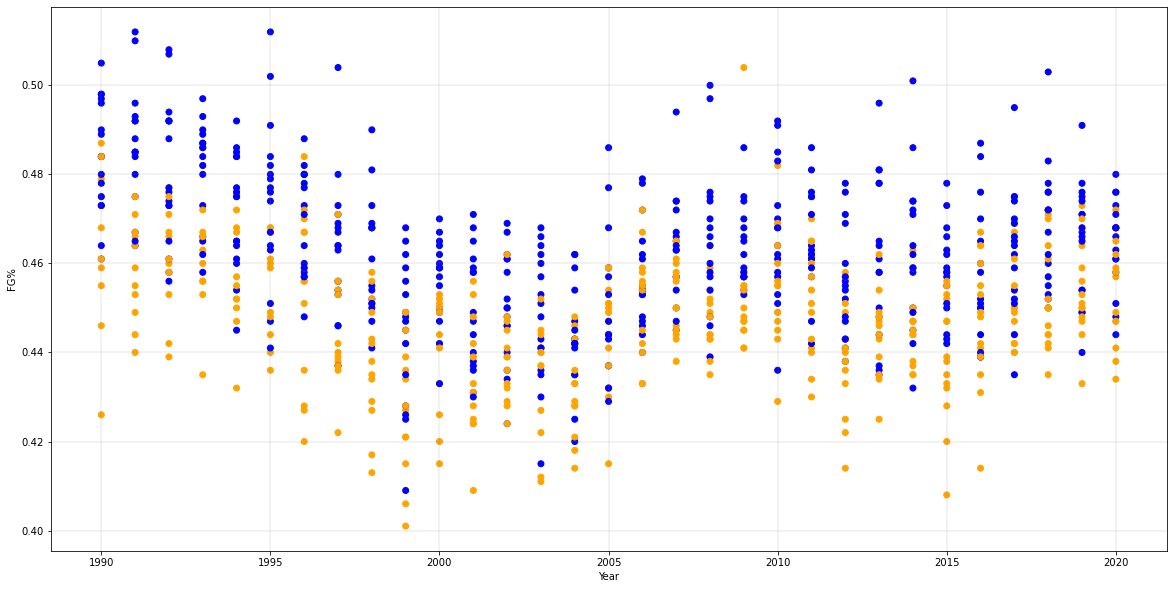

[[1.         0.42209335]
 [0.42209335 1.        ]]


In [67]:
plt.scatter(model_df['Year'], model_df['FG%'], c=model_df['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('FG%')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(model_df['FG%'], model_df['Playoffs']))

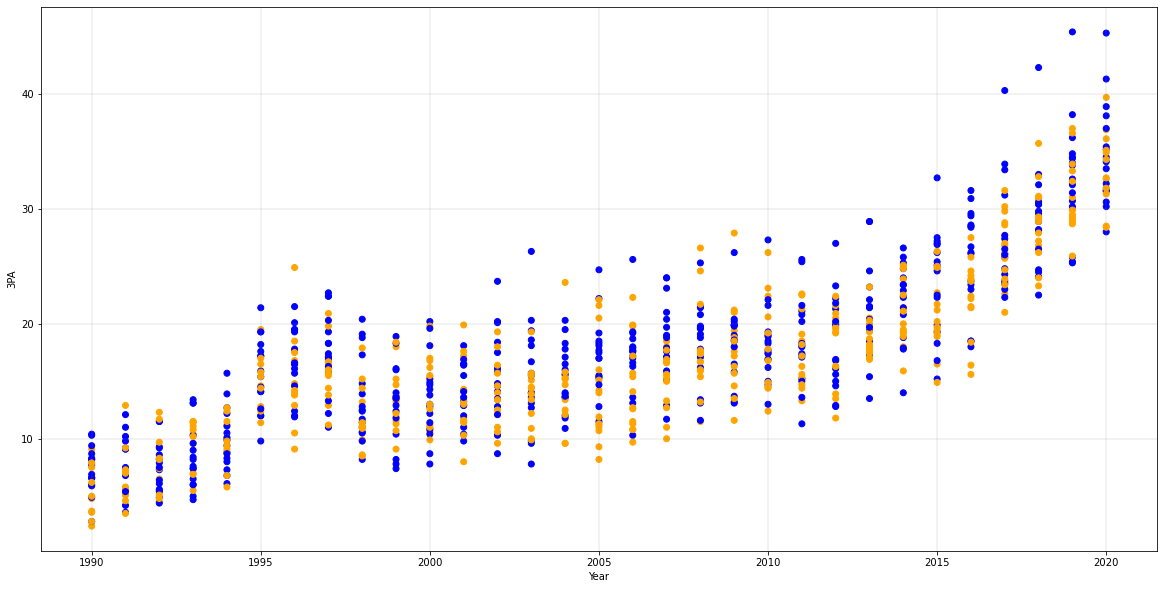

[[1.       0.051832]
 [0.051832 1.      ]]


In [68]:
plt.scatter(model_df['Year'], model_df['3PA'], c=model_df['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('3PA')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(model_df['3PA'], model_df['Playoffs']))

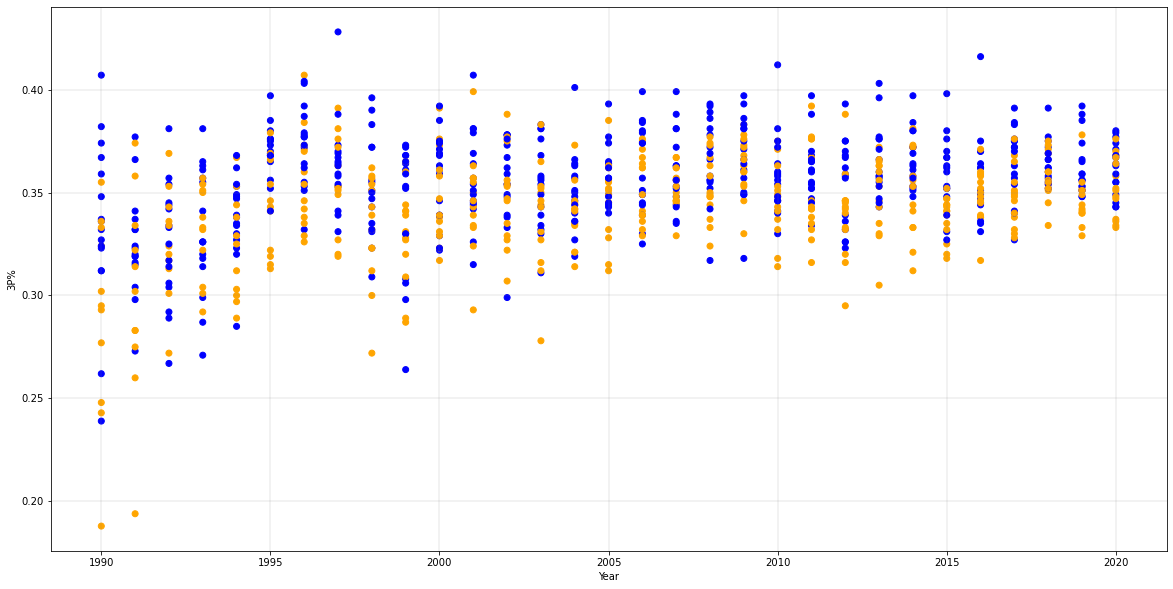

[[1.         0.24150766]
 [0.24150766 1.        ]]


In [69]:
plt.scatter(model_df['Year'], model_df['3P%'], c=model_df['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('3P%')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(model_df['3P%'], model_df['Playoffs']))

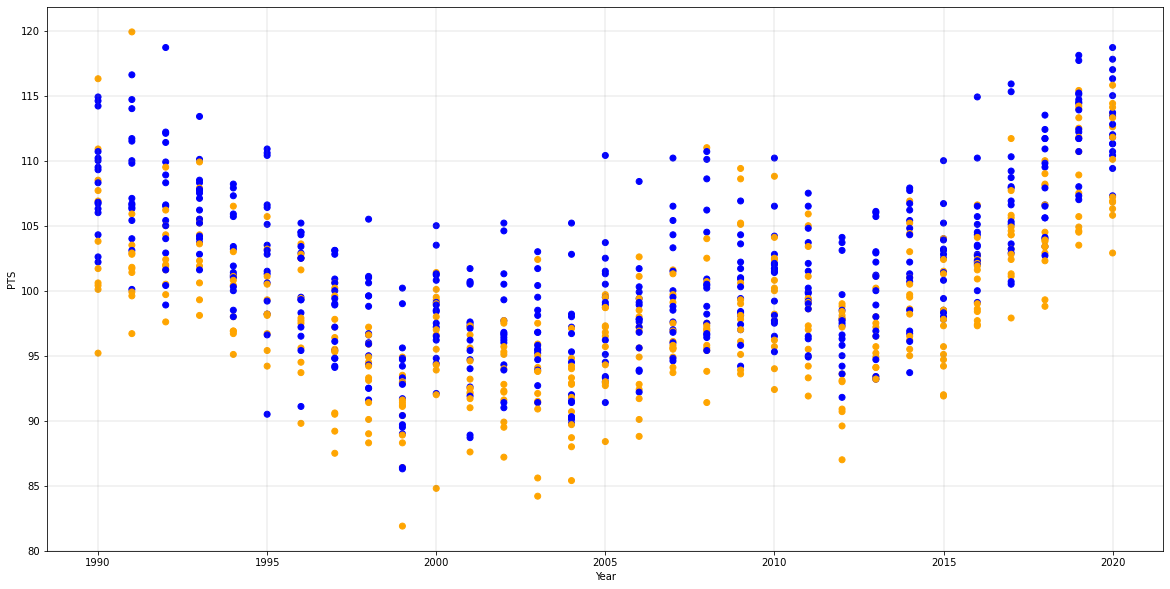

[[1.         0.23981935]
 [0.23981935 1.        ]]


In [70]:
plt.scatter(model_df['Year'], model_df['PTS'], c=model_df['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('PTS')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(model_df['PTS'], model_df['Playoffs']))

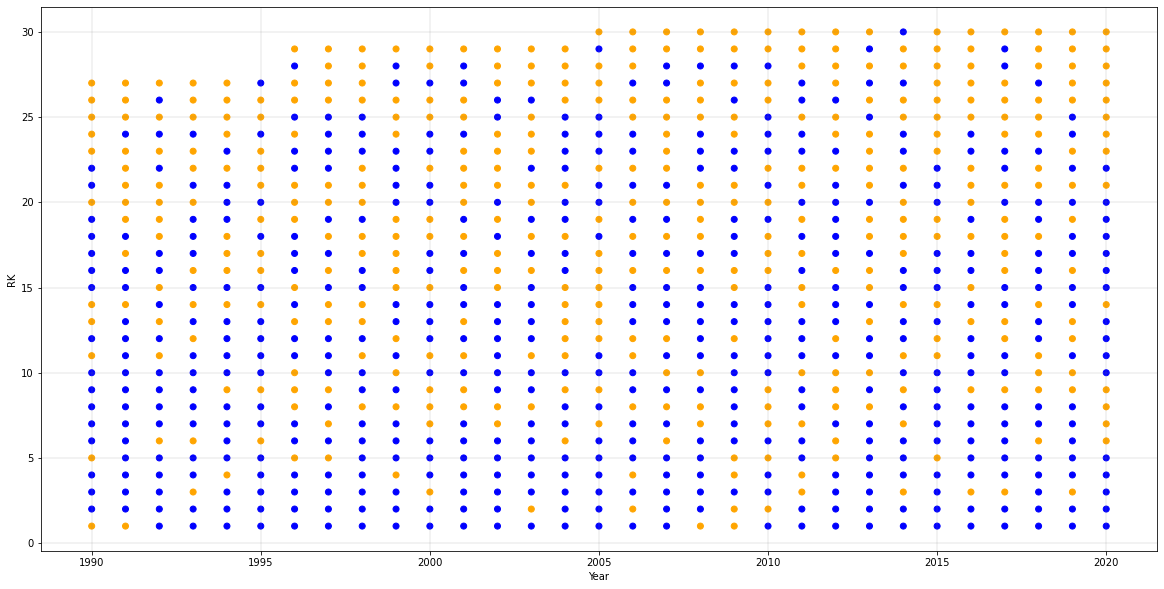

[[ 1.         -0.35804522]
 [-0.35804522  1.        ]]


In [71]:
plt.scatter(model_df['Year'], model_df['RK'], c=model_df['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('RK')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(model_df['RK'], model_df['Playoffs']))

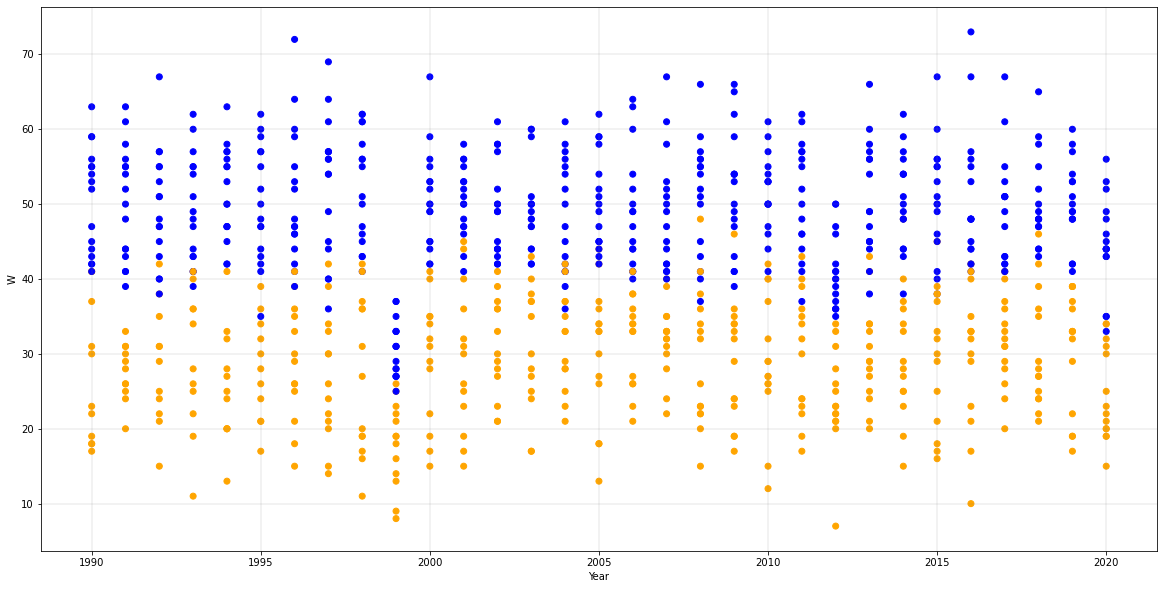

[[1.         0.78460503]
 [0.78460503 1.        ]]


In [72]:
plt.scatter(model_df['Year'], model_df['W'], c=model_df['Playoffs'].apply(lambda x: colors[x]))
plt.xlabel('Year')
plt.ylabel('W')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.8)
plt.show()

print(np.corrcoef(model_df['W'], model_df['Playoffs']))

In [73]:
# How many teams ranked in the top 16 but did not make the playoffs

rank_playoffs = (model_df.RK <= 16) & (model_df.Playoffs == 0)
check = model_df[rank_playoffs]
check

,RK,Team,Year,G,W,L,Conference,MP,FG,FGA,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,Playoffs
0,1,Golden State Warriors,1990,82,37,45,West,240.3,42.5,87.9,...,0.809,11.2,29.1,24.1,9.2,6.0,17.3,24.5,116.3,0
4,5,Orlando Magic,1990,82,18,64,East,241.5,42.2,91.8,...,0.756,15.9,30.1,24.3,7.5,3.6,17.2,24.1,110.9,0
10,11,Atlanta Hawks,1990,82,41,41,East,240.6,41.7,85.6,...,0.764,15.5,26.7,22.2,8.7,4.3,15.5,22.8,108.5,0
12,13,Washington Bullets,1990,82,31,51,East,241.8,43.9,92.5,...,0.764,14.6,29.9,27.0,6.8,5.2,14.6,23.5,107.7,0
13,14,Seattle SuperSonics,1990,82,41,41,West,242.7,42.3,88.3,...,0.741,16.1,27.5,22.9,8.5,4.1,16.3,25.2,106.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,6,New Orleans Pelicans,2020,72,30,42,West,242.1,42.6,91.6,...,0.729,11.1,35.4,26.8,7.5,5.0,16.4,21.2,115.8,0
879,7,Phoenix Suns,2020,73,34,39,West,241.0,41.2,88.1,...,0.834,9.8,33.8,27.2,7.7,4.0,14.8,22.0,113.6,0
880,8,Washington Wizards,2020,72,25,47,East,241.0,41.5,90.9,...,0.788,10.2,31.9,25.0,8.0,4.3,14.2,22.7,114.4,0
881,9,Memphis Grizzlies,2020,73,34,39,West,240.7,42.5,90.9,...,0.763,10.3,36.2,26.9,7.9,5.5,15.2,21.2,112.6,0


In [74]:
# Basic Pandas correlation test

corr_test = model_df.corr()
corr_test.index

Index(['RK', 'Year', 'G', 'W', 'L', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Playoffs'],
      dtype='object')

In [75]:
# Finding variables that have a Correlation of at least 25% strength with the team rank

corr = model_df.corr().abs()
corr = corr.loc[corr['RK']>.25]
corr.index

Index(['RK', 'W', 'L', 'FG', 'FGA', 'FG%', '3P%', '2P%', 'FT', 'FTA', 'AST',
       'PTS', 'Playoffs'],
      dtype='object')

In [76]:
# Finding variables that have a Correlation of at least 50% strength with the team rank

corr = model_df.corr().abs()
corr = corr.loc[corr['RK']>.50]
corr.index

Index(['RK', 'FG', 'FG%', 'PTS'], dtype='object')

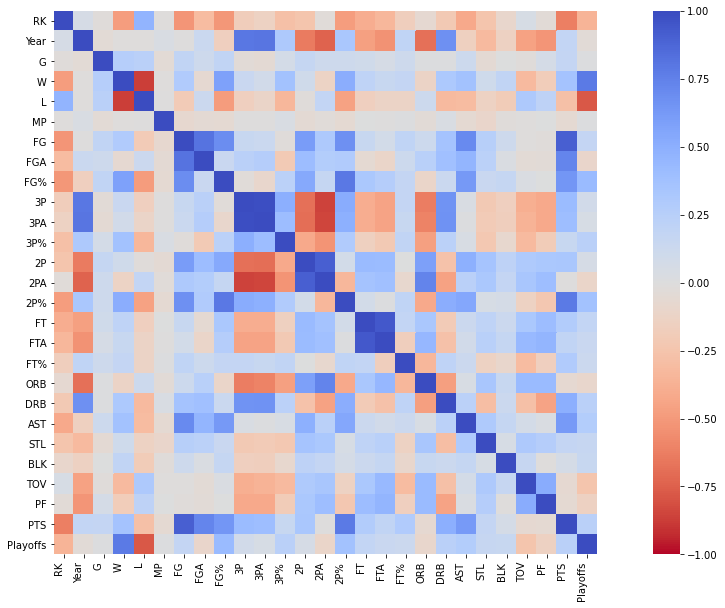

In [77]:
# Blue means positive correlation, red means negative. The stronger the color, the larger the correlation magnitude. 
# https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

corr = model_df.corr()
plt.rcParams['figure.figsize'] = (20.0, 10.0)
ax = sns.heatmap(
    corr,
    vmin=-1, center = 0,
    cmap='coolwarm_r',
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);